In [1]:
import json
import csv
import pandas as pd
#outfile = open("business.tsv", 'w')
#sfile = csv.writer(outfile, delimiter ="\t", quoting=csv.QUOTE_MINIMAL)
#sfile.writerow(['business_id','review_count', 'name'])
#with open('data/yelp_academic_dataset_business.json', encoding="utf-8") as f:
#        for line in f:
#            row = json.loads(line)
#            # some special char must be encoded in 'utf-8'
#            sfile.writerow([row['business_id'], row['review_count'], (row['name']).encode('utf-8')])
#outfile.close()

business_df = pd.read_csv('business.tsv', delimiter ="\t", encoding="utf-8")
review_df = pd.read_csv('review_stars.tsv', delimiter ="\t", encoding="utf-8")
print(review_df.shape)
print(review_df.head())
print('XXXXXXXXXXXXXX')
print(business_df.shape)
print(business_df.head())


(8635403, 3)
              business_id  stars  \
0  buF9druCkbuXLX526sGELQ    4.0   
1  RA4V8pr014UyUbDvI-LW2A    4.0   
2  _sS2LBIGNT5NQb6PD1Vtjw    5.0   
3  0AzLzHfOJgL7ROwhdww2ew    2.0   
4  8zehGz9jnxPqXtOc7KaJxA    4.0   

                                                text  
0  b"Apparently Prides Osteria had a rough summer...  
1  b'This store is pretty good. Not as great as W...  
2  b"I called WVM on the recommendation of a coup...  
3  b"I've stayed at many Marriott and Renaissance...  
4  b"The food is always great here. The service f...  
XXXXXXXXXXXXXX
(160585, 3)
              business_id  review_count                        name
0  6iYb2HFDywm3zjuRg0shjw            86      b'Oskar Blues Taproom'
1  tCbdrRPZA0oiIYSmHG3J0w           126  b'Flying Elephants at PDX'
2  bvN78flM8NLprQ1a1y5dRg            13           b'The Reclaimory'
3  oaepsyvc0J17qwi8cfrOWg             8              b'Great Clips'
4  PE9uqAjdw0E4-8mjGl3wVA            14        b'Crossfit Terminus'


In [2]:
#removing businesses with < 20 reviews
business_df20 = business_df[business_df['review_count'] > 19]
print(business_df20.shape)
print(business_df20.head(50))

(73031, 3)
                business_id  review_count  \
0    6iYb2HFDywm3zjuRg0shjw            86   
1    tCbdrRPZA0oiIYSmHG3J0w           126   
5    D4JtQNTI4X3KcbzacDJsMw           169   
8    N3_Gs3DnX4k9SgpwJxdEfw            30   
12   HPA_qyMEddpAEtFof02ixg            39   
13   ufCxltuh56FF4-ZFZ6cVhg           135   
17   MUeUyqhMja-nnmvgP4rBBg            55   
23   j68RDnvOaYEwGcY9cTEHpA           406   
24   nTIhpR7MhsALPwg_Hh14EA           139   
26   hcRxdDg7DYryCxCoI8ySQA            24   
28   arEXRZYu8220bFBJ3VAh3A           170   
29   jGennaZUr2MsJyRhijNBfA           856   
32   uMGsjQGT35rX4AAt1Hp9og            25   
33   QciD6FbNklaJvUbLExD4Nw            76   
39   s8eTWEtW5WcnL2kUxrOVmw            48   
41   NRPemqVb4qpWFF0Avq_6OQ           395   
42   TRToVIbaVtu1KOE8DR9gCw           102   
43   Yyym58vWvlRPuMCOICWRBw            27   
44   BFd5KnVmxkFH3WjbydJI3Q            21   
46   D2VwAQBBxfm_l9rYesXaxQ            32   
49   1bT6-v29xAoA0ELXF1Ncjw            23   

In [3]:
# sum all text for each business and group by business id
df_review_agg = review_df.groupby('business_id')['text'].sum()
df_star_avg = review_df.groupby('business_id')['stars'].mean()
print(df_review_agg.shape)
print(df_review_agg.head(10))
print(df_star_avg.shape)
print(df_star_avg.head(10))

(160585,)
business_id
--0DF12EMHYI8XIgoFha6A    b"Being from Chicago originally and moving thi...
--0r8K_AQ4FZfLsX3ZYRDA    b'Quick and reasonably priced service. Dropped...
--0zrn43LEaB4jUWTQH_Bg    b'-Rude staff and management. \n-They do not v...
--164t1nclzzmca7eDiJMw    b'Banh mi was pretty weak.'b'Incredibly good f...
--2aF9NhXnNVpDV0KS3xBQ    b'I recently moved to Delaney Park, and Spence...
--2mEJ63SC_8_08_jGgVIg    b'I love this place!!! Always get my nails don...
--4INAzazK6omgf3mY3dfw    b'These guys were great. Excellent communicati...
--6COJIAjkQwSUZci_4PJQ    b'Casually comfortable and pleasant environmen...
--DzGwfuJH12DjYz95VW0Q    b"Pretty standard for a UHaul place - I have b...
--EoF6KmeDuki2vBWhPqCw    b'I\'ve been with rogers for 4 years now, and ...
Name: text, dtype: object
(160585,)
business_id
--0DF12EMHYI8XIgoFha6A    4.333333
--0r8K_AQ4FZfLsX3ZYRDA    5.000000
--0zrn43LEaB4jUWTQH_Bg    1.000000
--164t1nclzzmca7eDiJMw    3.877551
--2aF9NhXnNVpDV0KS3xBQ    2.55

In [29]:
# businessdf20 has business_id column
# review agg has business_id index
business_review_agg_df = pd.merge(df_review_agg, business_df20, left_index=True, right_on='business_id')
business_review_agg_df = business_review_agg_df.set_index('business_id')
print(business_review_agg_df.columns) 
names_df = business_review_agg_df['name']
business_review_agg_df.drop('name', 1, inplace=True)
business_review_agg_df.drop('review_count', 1, inplace=True)
series = business_review_agg_df.squeeze('columns')

# convert to numpy array for sklearn preparation
#business_review_agg_arr = business_review_agg_df.to_numpy()
print(business_review_agg_df.shape)
print(business_review_agg_df.columns)
print(business_review_agg_df.head(10))


Index(['text', 'review_count', 'name'], dtype='object')
<class 'pandas.core.series.Series'>
(73031, 1)
Index(['text'], dtype='object')
                                                                     text
business_id                                                              
--164t1nclzzmca7eDiJMw  b'Banh mi was pretty weak.'b'Incredibly good f...
--6COJIAjkQwSUZci_4PJQ  b'Casually comfortable and pleasant environmen...
--JKSSgnfoOjVDFGv692BA  b'Fast service. $15 bucks and I was outta ther...
--Q3mAcX9t63f7Xcbn7LVA  b'this place was truly amazing place!from the ...
--TEGvhgrXwHnRjiFbK08Q  b"I have been getting facials from Danica for ...
--ToovR1Ob2e131ZifC9Eg  b"When you realize adulting is real. I had to ...
--UNNdnHRhsyFUbDgumdtQ  b"Le Pigeon is a dining experience that's a lo...
--bbZa1KPYSmW0X4o3TUQw  b"I can't believe this place only got three an...
--hkbIWgBKBOZq4VcNwdhQ  b'We have been loyal Night Shift fans since th...
--iiZK8pW7kC2Tr2PdQrQw  b"I've been pretty satisfie

In [20]:
print(names_df.head(10))

business_id
--164t1nclzzmca7eDiJMw                    b'Me So Hungry'
--6COJIAjkQwSUZci_4PJQ                          b'Medley'
--JKSSgnfoOjVDFGv692BA              b'Guerrero Tire Shop'
--Q3mAcX9t63f7Xcbn7LVA                       b'The Royce'
--TEGvhgrXwHnRjiFbK08Q    b'Skingredient by Danica Green'
--ToovR1Ob2e131ZifC9Eg            b'A & D Automotive Inc'
--UNNdnHRhsyFUbDgumdtQ                       b'Le Pigeon'
--bbZa1KPYSmW0X4o3TUQw                         b'Sorella'
--hkbIWgBKBOZq4VcNwdhQ             b'Night Shift Brewing'
--iiZK8pW7kC2Tr2PdQrQw              b'Diamond Nail Salon'
Name: name, dtype: object


In [30]:
bus_reviewagg_staravg_df = pd.merge(business_review_agg_df, df_star_avg, on='business_id')
#bus_reviewagg_staravg_df = bus_reviewagg_staravg_df.drop('name', 1, inplace=True)
print(bus_reviewagg_staravg_df.shape)
print(bus_reviewagg_staravg_df.head(10))

(73031, 2)
                                                                     text  \
business_id                                                                 
--164t1nclzzmca7eDiJMw  b'Banh mi was pretty weak.'b'Incredibly good f...   
--6COJIAjkQwSUZci_4PJQ  b'Casually comfortable and pleasant environmen...   
--JKSSgnfoOjVDFGv692BA  b'Fast service. $15 bucks and I was outta ther...   
--Q3mAcX9t63f7Xcbn7LVA  b'this place was truly amazing place!from the ...   
--TEGvhgrXwHnRjiFbK08Q  b"I have been getting facials from Danica for ...   
--ToovR1Ob2e131ZifC9Eg  b"When you realize adulting is real. I had to ...   
--UNNdnHRhsyFUbDgumdtQ  b"Le Pigeon is a dining experience that's a lo...   
--bbZa1KPYSmW0X4o3TUQw  b"I can't believe this place only got three an...   
--hkbIWgBKBOZq4VcNwdhQ  b'We have been loyal Night Shift fans since th...   
--iiZK8pW7kC2Tr2PdQrQw  b"I've been pretty satisfied with this place. ...   

                           stars  
business_id                  

In [31]:
bus_reviewagg_staravg_df = pd.merge(bus_reviewagg_staravg_df, names_df, on='business_id')
print(bus_reviewagg_staravg_df.shape)
print(bus_reviewagg_staravg_df.columns)
print(bus_reviewagg_staravg_df.head(10))

(73031, 3)
Index(['text', 'stars', 'name'], dtype='object')
                                                                     text  \
business_id                                                                 
--164t1nclzzmca7eDiJMw  b'Banh mi was pretty weak.'b'Incredibly good f...   
--6COJIAjkQwSUZci_4PJQ  b'Casually comfortable and pleasant environmen...   
--JKSSgnfoOjVDFGv692BA  b'Fast service. $15 bucks and I was outta ther...   
--Q3mAcX9t63f7Xcbn7LVA  b'this place was truly amazing place!from the ...   
--TEGvhgrXwHnRjiFbK08Q  b"I have been getting facials from Danica for ...   
--ToovR1Ob2e131ZifC9Eg  b"When you realize adulting is real. I had to ...   
--UNNdnHRhsyFUbDgumdtQ  b"Le Pigeon is a dining experience that's a lo...   
--bbZa1KPYSmW0X4o3TUQw  b"I can't believe this place only got three an...   
--hkbIWgBKBOZq4VcNwdhQ  b'We have been loyal Night Shift fans since th...   
--iiZK8pW7kC2Tr2PdQrQw  b"I've been pretty satisfied with this place. ...   

               

In [6]:
df_ready_for_sklearn = pd.DataFrame({'business_id': series.index, 'all_reviews': series.values})
print(df_ready_for_sklearn.shape)
print(df_ready_for_sklearn.head(10))

(73031, 2)
              business_id                                        all_reviews
0  --164t1nclzzmca7eDiJMw  b'Banh mi was pretty weak.'b'Incredibly good f...
1  --6COJIAjkQwSUZci_4PJQ  b'Casually comfortable and pleasant environmen...
2  --JKSSgnfoOjVDFGv692BA  b'Fast service. $15 bucks and I was outta ther...
3  --Q3mAcX9t63f7Xcbn7LVA  b'this place was truly amazing place!from the ...
4  --TEGvhgrXwHnRjiFbK08Q  b"I have been getting facials from Danica for ...
5  --ToovR1Ob2e131ZifC9Eg  b"When you realize adulting is real. I had to ...
6  --UNNdnHRhsyFUbDgumdtQ  b"Le Pigeon is a dining experience that's a lo...
7  --bbZa1KPYSmW0X4o3TUQw  b"I can't believe this place only got three an...
8  --hkbIWgBKBOZq4VcNwdhQ  b'We have been loyal Night Shift fans since th...
9  --iiZK8pW7kC2Tr2PdQrQw  b"I've been pretty satisfied with this place. ...


In [7]:
import sklearn.feature_extraction.text as sk_text

vectorizer = sk_text.TfidfVectorizer(
                              stop_words='english',
                             max_features = 3000,
                             min_df=75)


#max_features:  build a vocabulary that only consider the top max_features features ordered by term frequency across the corpus.

matrix = vectorizer.fit_transform(df_ready_for_sklearn.all_reviews)

print(type(matrix))          # Compressed Sparse Row matrix
#print(matrix.toarray())        #  convert it to numpy array

<class 'scipy.sparse.csr.csr_matrix'>


In [8]:
print(vectorizer.get_feature_names())

['00', '000', '10', '100', '11', '12', '13', '14', '15', '16', '17', '18', '19', '1st', '20', '200', '21', '22', '24', '25', '2nd', '30', '300', '30pm', '35', '3rd', '40', '45', '4th', '50', '500', '60', '6pm', '70', '75', '7pm', '80', '90', '95', '99', 'able', 'absolute', 'absolutely', 'ac', 'accept', 'acceptable', 'access', 'accident', 'accommodate', 'accommodating', 'according', 'account', 'act', 'action', 'actual', 'actually', 'add', 'added', 'adding', 'addition', 'additional', 'address', 'adds', 'admit', 'adorable', 'adult', 'adults', 'advance', 'advantage', 'advertised', 'advice', 'afford', 'affordable', 'afraid', 'afternoon', 'age', 'ago', 'agree', 'agreed', 'ahead', 'aioli', 'air', 'airport', 'al', 'alcohol', 'ale', 'allergies', 'allow', 'allowed', 'almond', 'alot', 'alright', 'alternative', 'amazed', 'amazing', 'amazingly', 'ambiance', 'ambience', 'amenities', 'america', 'american', 'ample', 'angry', 'animal', 'animals', 'anniversary', 'annoyed', 'annoying', 'answer', 'answere

In [9]:
tfidf_data = matrix.toarray() 

In [10]:
stars_array = bus_reviewagg_staravg_df.stars.to_numpy()

In [11]:
from sklearn.model_selection import train_test_split

# Use the tfidf_data matrix for the X for the model. 
# Use the aligned star rating data for the Y in the model. 
x_train, x_test, y_train, y_test = train_test_split(tfidf_data, stars_array, test_size=0.20, random_state=45) 

In [12]:
import numpy as np

from sklearn import metrics

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

import shutil
import os


# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)



# Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_


# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd


# Convert all missing values in the specified column to the median
def missing_median(df, name):
    med = df[name].median()
    df[name] = df[name].fillna(med)


# Convert all missing values in the specified column to the default
def missing_default(df, name, default_value):
    df[name] = df[name].fillna(default_value)


# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column. 
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)

# Nicely formatted time string
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)


# Regression chart.
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

# Remove all rows where the specified column is +/- sd standard deviations
def remove_outliers(df, name, sd):
    drop_rows = df.index[(np.abs(df[name] - df[name].mean()) >= (sd * df[name].std()))]
    df.drop(drop_rows, axis=0, inplace=True)


# Encode a column to a range between normalized_low and normalized_high.
def encode_numeric_range(df, name, normalized_low=-1, normalized_high=1,
                         data_low=None, data_high=None):
    if data_low is None:
        data_low = min(df[name])
        data_high = max(df[name])

    df[name] = ((df[name] - data_low) / (data_high - data_low)) \
               * (normalized_high - normalized_low) + normalized_low

In [13]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print(tf.test.gpu_device_name())

Num GPUs Available:  0



In [204]:
# Split into train/test
from tensorflow.keras.callbacks import ModelCheckpoint
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, show

model = Sequential()
model.add(Dense(20, input_dim=tfidf_data.shape[1], activation='relu'))
model.add(Dense(10))

model.add(Dense(1))  # 1 output neuron 

model.compile(loss='mean_squared_error', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
checkpointer = ModelCheckpoint(filepath="dnn/best_weights.hdf5", verbose=0, save_best_only=True) # save best model

model.fit(x_train,y_train, validation_data=(x_test,y_test),callbacks=[monitor, checkpointer],verbose=2,epochs=100)
model.load_weights('dnn/best_weights.hdf5') # load weights from best model


Epoch 1/100
1826/1826 - 2s - loss: 0.4253 - val_loss: 0.0737
Epoch 2/100
1826/1826 - 2s - loss: 0.0648 - val_loss: 0.0598
Epoch 3/100
1826/1826 - 2s - loss: 0.0570 - val_loss: 0.0570
Epoch 4/100
1826/1826 - 2s - loss: 0.0546 - val_loss: 0.0569
Epoch 5/100
1826/1826 - 2s - loss: 0.0533 - val_loss: 0.0556
Epoch 6/100
1826/1826 - 2s - loss: 0.0521 - val_loss: 0.0566
Epoch 7/100
1826/1826 - 2s - loss: 0.0508 - val_loss: 0.0580
Epoch 8/100
1826/1826 - 2s - loss: 0.0504 - val_loss: 0.0558
Epoch 9/100
1826/1826 - 2s - loss: 0.0498 - val_loss: 0.0554
Epoch 10/100
1826/1826 - 2s - loss: 0.0494 - val_loss: 0.0554
Epoch 00010: early stopping


In [205]:
#predicting
pred = model.predict(x_test)

Final score (MSE): 0.05536085806710012
Final score (RMSE): 0.2352888821578702


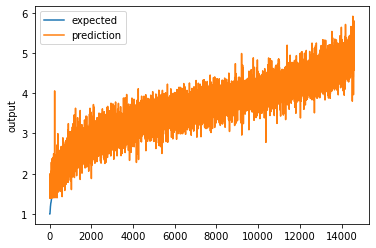

In [206]:
# Measure MSE error.  
score = metrics.mean_squared_error(pred,y_test)
print("Final score (MSE): {}".format(score))
# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))

# Plot the chart
chart_regression(pred.flatten(),y_test, sort=True)

In [207]:
column_names = ['business_id', 'name', 'stars']

pred_df = pd.DataFrame(index= range(5), columns = column_names)

random_numbers = np.random.choice(tfidf_data.shape[0], 5)
print(random_numbers)
random_business_data = tfidf_data[np.random.choice(tfidf_data.shape[0], 5)]
pred5 = model.predict(random_business_data)


[28613 53124 37150 48217  2548]


In [208]:
pred_df['index'] = random_numbers
pred_df['predicted_stars'] = pred5
for i in range(5):
    pred_df['business_id'][i] = bus_reviewagg_staravg_df.loc[random_numbers[i], 'business_id']
    pred_df['name'][i] = bus_reviewagg_staravg_df.loc[random_numbers[i], 'name']
    pred_df['stars'][i] = bus_reviewagg_staravg_df.loc[random_numbers[i], 'stars']
print(pred_df.head())

              business_id                              name     stars  index  \
0  NkOmKD_6KPMPD2NRAD-TEw          b'Good Carma Automotive'  4.742857  28613   
1  iRk6W68B2LDZTUkKNmyngw                  b'The Mad Greek'   4.02439  53124   
2  VND3KOtBF5tb-AxeKNy71g     b"Jimmy's Pizza & Restaurant"  4.185185  37150   
3  e4eGo6FWJGVeNWpk2aX-Zw  b'Nationwide Security Solutions'      1.36  48217   
4  1EqU3wlAS1wgGQvYVl8UuQ            b'Flying Pie Pizzeria'  3.834123   2548   

   predicted_stars  
0         4.240113  
1         3.658307  
2         3.625733  
3         2.947861  
4         2.933656  


<ipython-input-208-8301cd265ea5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_df['business_id'][i] = bus_reviewagg_staravg_df.loc[random_numbers[i], 'business_id']
<ipython-input-208-8301cd265ea5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_df['name'][i] = bus_reviewagg_staravg_df.loc[random_numbers[i], 'name']
<ipython-input-208-8301cd265ea5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_df['stars'][i] = bus